In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
Rates=pd.read_csv('C:\\Users\\fhrt8\\Desktop\\DATA\\Epsilon Enterprises\\Data\\Courier Company - Rates.csv')
Invoice=pd.read_csv('C:\\Users\\fhrt8\\Desktop\\DATA\\Epsilon Enterprises\\Data\\Invoice.csv')
Order_Report=pd.read_csv('C:\\Users\\fhrt8\\Desktop\\DATA\\Epsilon Enterprises\\Data\\Order Report.csv')
Pincodes=pd.read_csv('C:\\Users\\fhrt8\\Desktop\\DATA\\Epsilon Enterprises\\Data\\pincodes.csv')
sku=pd.read_csv('C:\\Users\\fhrt8\\Desktop\\DATA\\Epsilon Enterprises\\Data\\SKU Master.csv')

In [7]:
Invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [24]:
#list_table_names=['Rates','Invoice','Order_Report','Pincodes','sku']
list_table=[Rates,Invoice,Order_Report,Pincodes,sku]
for i in list_table:
    print(f"{i.head()}\n")

   fwd_a_fixed  fwd_a_additional  fwd_b_fixed  fwd_b_additional  fwd_c_fixed  \
0         29.5              23.6           33              28.3         40.1   

   fwd_c_additional  fwd_d_fixed  fwd_d_additional  fwd_e_fixed  \
0              38.9         45.4              44.8         56.6   

   fwd_e_additional  rto_a_fixed  rto_a_additional  rto_b_fixed  \
0              55.5         13.6              23.6         20.5   

   rto_b_additional  rto_c_fixed  rto_c_additional  rto_d_fixed  \
0              28.3         31.9              38.9         41.3   

   rto_d_additional  rto_e_fixed  rto_e_additional  
0              44.8         50.7              55.5  

        AWB Code    Order ID  Charged Weight  Warehouse Pincode  \
0  1091117222124  2001806232            1.30             121003   
1  1091117222194  2001806273            1.00             121003   
2  1091117222931  2001806408            2.50             121003   
3  1091117223244  2001806458            1.00             12

In [25]:
# Check for missing values
print("\nMissing values in Website Order Report:")
print(Order_Report.isnull().sum())
print("\nMissing values in SKU Master:")
print(sku.isnull().sum())
print("\nMissing values in Pincode Mapping:")
print(Pincodes.isnull().sum())
print("\nMissing values in Courier Invoice:")
print(Invoice.isnull().sum())
print("\nMissing values in courier company rates:")
print(Rates.isnull().sum())


Missing values in Website Order Report:
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64

Missing values in SKU Master:
SKU            0
Weight (g)     0
Unnamed: 2    66
Unnamed: 3    66
Unnamed: 4    66
dtype: int64

Missing values in Pincode Mapping:
Warehouse Pincode      0
Customer Pincode       0
Zone                   0
Unnamed: 3           124
Unnamed: 4           124
dtype: int64

Missing values in Courier Invoice:
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

Missing values in courier company rates:
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed        

In [27]:
# Remove unnamed columns from the Website Order Report DataFrame
Order_Report = Order_Report.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Remove unnamed columns from the SKU Master DataFrame
sku = sku.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Remove unnamed columns from the Pincode Mapping DataFrame
Pincodes = Pincodes.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

In [33]:
# Merge the Order Report and SKU Master based on SKU
merged_data = pd.merge(Order_Report, sku, on='SKU')
merged_data.head()

,ExternOrderNo,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001821995,8904223818706,1.0,127
2,2001819252,8904223818706,1.0,127
3,2001816996,8904223818706,1.0,127
4,2001814580,8904223818706,1.0,127


In [38]:
# Rename the "ExternOrderNo" column to "Order ID" in the merged_data DataFrame
merged_data = merged_data.rename(columns={'ExternOrderNo': 'Order ID'})
merged_data.head()

,Order ID,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001821995,8904223818706,1.0,127
2,2001819252,8904223818706,1.0,127
3,2001816996,8904223818706,1.0,127
4,2001814580,8904223818706,1.0,127


In [39]:
abc_courier = Pincodes.drop_duplicates(subset=['Customer Pincode'])
courier_abc= Invoice[['Order ID', 'Customer Pincode','Type of Shipment']]
pincodes= courier_abc.merge(abc_courier,on='Customer Pincode')
print(pincodes.head())

     Order ID  Customer Pincode Type of Shipment  Warehouse Pincode Zone
0  2001806232            507101  Forward charges             121003    d
1  2001806273            486886  Forward charges             121003    d
2  2001806408            532484  Forward charges             121003    d
3  2001806458            143001  Forward charges             121003    b
4  2001807012            515591  Forward charges             121003    d


In [40]:
#Merging the pincodes with the main dataframe
merged2 = merged_data.merge(pincodes, on='Order ID')

In [41]:
#Calculating the weight in kg
merged2['Weights (Kgs)'] = merged2['Weight (g)'] / 1000

In [42]:
# Calculating the weight slabs
def weight_slab(weight):
    i = round(weight % 1, 1)
    if i == 0.0:
        return weight
    elif i > 0.5:
        return int(weight) + 1.0
    else:
        return int(weight) + 0.5

In [43]:
# Applying the weight slab
merged2['Weight Slab (KG)'] = merged2['Weights (Kgs)'].apply(weight_slab)
Invoice['Weight Slab Charged by Courier Company']=(Invoice['Charged Weight']).apply(weight_slab)

In [44]:
Invoice = Invoice.rename(columns={'Zone': 'Delivery Zone Charged by Courier Company'})
merged2 = merged2.rename(columns={'Zone': 'Delivery Zone As Per ABC'})
merged2 = merged2.rename(columns={'Weight Slab (KG)': 'Weight Slab As Per ABC'})

In [45]:
# Calculating the expected charges
total_expected_charge = []
for _, row in merged2.iterrows():
    fwd_category = 'fwd_' + row['Delivery Zone As Per ABC']
    fwd_fixed = Rates.at[0, fwd_category + '_fixed']
    fwd_additional = Rates.at[0, fwd_category + '_additional']
    rto_category = 'rto_' + row['Delivery Zone As Per ABC']
    rto_fixed = Rates.at[0, rto_category + '_fixed']
    rto_additional = Rates.at[0, rto_category + '_additional']

    weight_slab = row['Weight Slab As Per ABC']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * (fwd_additional + rto_additional))
    else:
        total_expected_charge.append(0)

merged2['Expected Charge as per ABC'] = total_expected_charge
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per ABC  Weights (Kgs)  \
0  Forward charges             121003                        e          0.127   
1  Forward charges             121003                        e          0.150   
2  Forward charges             121003                        e          0.100   
3  Forward charges             121003                        e          0.165   
4  Forward charges             121003                        e          0.350   

   Weight Slab As Per ABC  Expected Charge as per ABC  
0                 

In [46]:
# merging it with the courier invoice to display the final dataframe
merged_output = merged2.merge(Invoice, on='Order ID')
print(merged_output.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode_x  \
0  2001827036  8904223818706        1.0         127              173213   
1  2001827036  8904223819093        1.0         150              173213   
2  2001827036  8904223819109        1.0         100              173213   
3  2001827036  8904223818430        1.0         165              173213   
4  2001827036  8904223819277        1.0         350              173213   

  Type of Shipment_x  Warehouse Pincode_x Delivery Zone As Per ABC  \
0    Forward charges               121003                        e   
1    Forward charges               121003                        e   
2    Forward charges               121003                        e   
3    Forward charges               121003                        e   
4    Forward charges               121003                        e   

   Weights (Kgs)  Weight Slab As Per ABC  Expected Charge as per ABC  \
0          0.127                     0.5                

In [47]:
# Difference in charges
df_diff = merged_output
df_diff['Difference (Rs.)'] = df_diff['Billing Amount (Rs.)'] - df_diff['Expected Charge as per ABC']

df_new = df_diff[['Order ID', 'Difference (Rs.)', 'Expected Charge as per ABC']]

print(df_new.head())

     Order ID  Difference (Rs.)  Expected Charge as per ABC
0  2001827036              61.3                        56.6
1  2001827036              61.3                        56.6
2  2001827036              61.3                        56.6
3  2001827036              61.3                        56.6
4  2001827036              61.3                        56.6


In [48]:
# Summarizing the accuracy of B2B courier charges based on the charged prices and expected prices
# Calculate the total orders in each category
total_correctly_charged = len(df_new[df_new['Difference (Rs.)'] == 0])
total_overcharged = len(df_new[df_new['Difference (Rs.)'] > 0])
total_undercharged = len(df_new[df_new['Difference (Rs.)'] < 0])

# Calculate the total amount in each category
amount_overcharged = abs(df_new[df_new['Difference (Rs.)'] > 0]['Difference (Rs.)'].sum())
amount_undercharged = df_new[df_new['Difference (Rs.)'] < 0]['Difference (Rs.)'].sum()
amount_correctly_charged = df_new[df_new['Difference (Rs.)'] == 0]['Expected Charge as per ABC'].sum()

# Create a new DataFrame for the summary
summary_data = {'Description': ['Total Orders where ABC has been correctly charged',
                                'Total Orders where ABC has been overcharged',
                                'Total Orders where ABC has been undercharged'],
                'Count': [total_correctly_charged, total_overcharged, total_undercharged],
                'Amount (Rs.)': [amount_correctly_charged, amount_overcharged, amount_undercharged]}

df_summary = pd.DataFrame(summary_data)

print(df_summary)

                                         Description  Count  Amount (Rs.)
0  Total Orders where ABC has been correctly charged     12         507.6
1        Total Orders where ABC has been overcharged    382       33750.5
2       Total Orders where ABC has been undercharged      7        -165.2


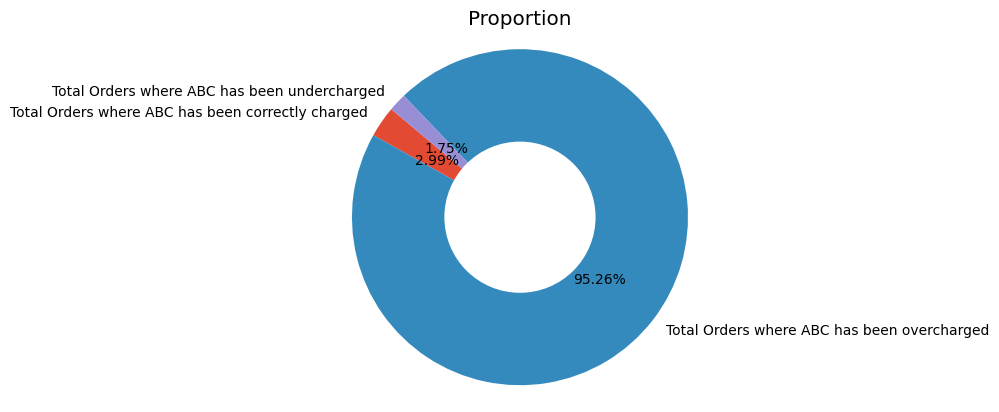

In [56]:
# Creating doughnut plot of the proportion
plt.style.use('ggplot')
plt.title('Proportion')
plt.pie(x=df_summary['Count'],labels=df_summary['Description'],autopct='%.2f%%', startangle=140)
plt.axis('equal')
circle=plt.Circle(xy=(0,0),radius=0.45,facecolor='white')
plt.gca().add_artist(circle)
plt.show()